In [1]:
B_TARGET_PANEL_WIDTH = 48

## Load experiment data

In [2]:
import pickle

# 'a_cols'
# 'a_nonzero'
# 'a_rows'
# 'a_size'
# 'a_unique'
# 'b_num_col'
# 'density'
# 'mat_file'
# 'xsmm_upstream_avg'
# 'xsmm_upstream_best'

In [3]:
DATA_DIR = "./../../logs/inv_B/"

In [89]:
num_runs = 3
runs = []
for i in range(1,num_runs+1):
    with open(DATA_DIR+"invb_results_{}".format(i), "rb") as f:
        runs.append(pickle.load(f))

## Load test matrix

In [61]:
import numpy as np

In [62]:
TEST_MAT = "./../../example_mats/quad/p4/gauss-legendre/m132.txt"

In [63]:
from calc_pseudo import clean, basic_flops

In [64]:
with open(TEST_MAT) as f:
    test_mat = clean(np.loadtxt(f))

In [65]:
FLOPS_PER_PANEL = basic_flops(test_mat, B_TARGET_PANEL_WIDTH)

In [66]:
FLOPS_PER_PANEL

11520.0

## Plots

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# slip 48 due to time == 0
num_cols = [96, 192, 480, 4800, 9600, 48000, 96000, 192000, 288000, 384000, 480000, 720000, 960000,
           1440000, 1920000, 2880000, 3840000, 4800000]

### Best Times

In [90]:
best = np.zeros(shape=[num_runs,len(num_cols)])
best_pfs = np.zeros(shape=[num_runs,len(num_cols)])

for i in range(num_runs):
    for j, cols in enumerate(num_cols):
        num_panels = cols / B_TARGET_PANEL_WIDTH
        time_per_panel_ms = runs[i]['xsmm_upstream_best'][j+1]/num_panels # j+1 - skip 48

        
        best[i,j] = time_per_panel_ms
        best_pfs[i,j] = FLOPS_PER_PANEL / (time_per_panel_ms*1e-3)

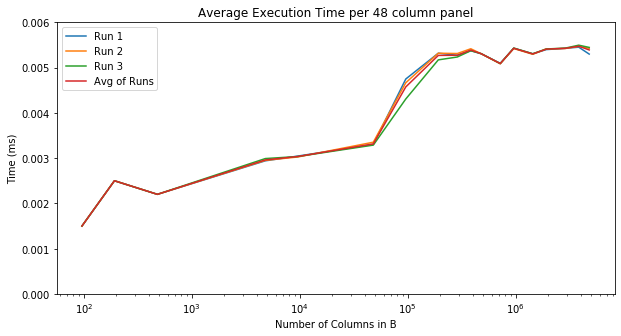

In [91]:
plt.figure(figsize=(10,5))
for i in range(num_runs):
    plt.plot(num_cols, best[i,:], label="Run {}".format(i+1))
plt.plot(num_cols, np.mean(best, axis=0), label="Avg of Runs")
plt.title("Average Execution Time per 48 column panel")
plt.ylabel("Time (ms)")
plt.xlabel("Number of Columns in B")
plt.xscale("log", basex=10)
plt.yticks([0.001*i for i in range(7)])
#plt.xticks(num_cols, rotation="45")
plt.legend()
plt.savefig("./../../plots/inv_B/avg_time_best_times.png")
plt.show()

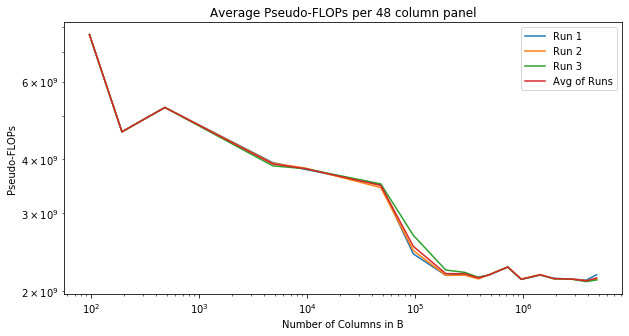

In [92]:
plt.figure(figsize=(10,5))
for i in range(num_runs):
    plt.plot(num_cols, best_pfs[i,:], label="Run {}".format(i+1))
plt.plot(num_cols, np.mean(best_pfs, axis=0), label="Avg of Runs")
plt.title("Average Pseudo-FLOPs per 48 column panel")
plt.ylabel("Pseudo-FLOPs")
plt.xlabel("Number of Columns in B")
plt.xscale("log", basex=10)
plt.yscale("log", basey=10)
#plt.yticks([0.001*i for i in range(7)])
#plt.xticks(num_cols, rotation="45")
plt.legend()
plt.savefig("./../../plots/inv_B/avg_pFLOPs_best_times.png")
plt.show()

### Avg Times

In [93]:
avg = np.zeros(shape=[num_runs,len(num_cols)])
avg_pfs = np.zeros(shape=[num_runs,len(num_cols)])

for i in range(num_runs):
    for j, cols in enumerate(num_cols):
        num_panels = cols / B_TARGET_PANEL_WIDTH
        time_per_panel_ms = runs[i]['xsmm_upstream_avg'][j+1]/num_panels # j+1 - skip 48

        
        avg[i,j] = time_per_panel_ms
        avg_pfs[i,j] = FLOPS_PER_PANEL / (time_per_panel_ms*1e-3)

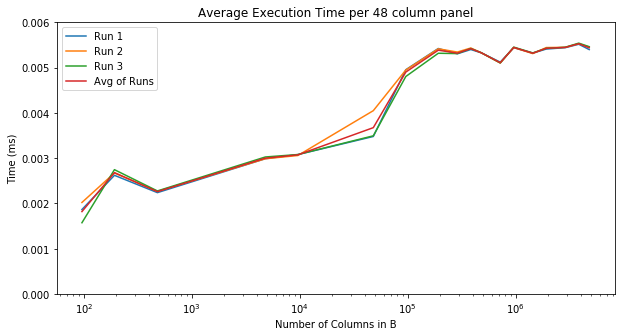

In [94]:
plt.figure(figsize=(10,5))
for i in range(num_runs):
    plt.plot(num_cols, avg[i,:], label="Run {}".format(i+1))
plt.plot(num_cols, np.mean(avg, axis=0), label="Avg of Runs")
plt.title("Average Execution Time per 48 column panel")
plt.ylabel("Time (ms)")
plt.xlabel("Number of Columns in B")
plt.xscale("log", basex=10)
plt.yticks([0.001*i for i in range(7)])
#plt.xticks(num_cols, rotation="45")
plt.legend()
plt.savefig("./../../plots/inv_B/avg_time_avg_times.png")
plt.show()

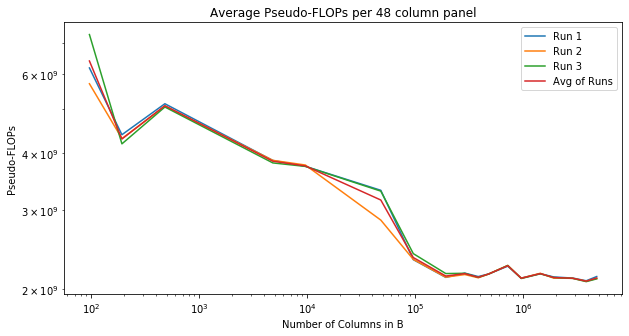

In [95]:
plt.figure(figsize=(10,5))
for i in range(num_runs):
    plt.plot(num_cols, avg_pfs[i,:], label="Run {}".format(i+1))
plt.plot(num_cols, np.mean(avg_pfs, axis=0), label="Avg of Runs")
plt.title("Average Pseudo-FLOPs per 48 column panel")
plt.ylabel("Pseudo-FLOPs")
plt.xlabel("Number of Columns in B")
plt.xscale("log", basex=10)
plt.yscale("log", basey=10)
#plt.yticks([0.001*i for i in range(7)])
#plt.xticks(num_cols, rotation="45")
plt.legend()
plt.savefig("./../../plots/inv_B/avg_pFLOPs_avg_times.png")
plt.show()